In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**ELU Activation:**
- Outperformed all ReLU variants
- Training time was reduced and the neural network performed better on the test sets

- From the formula it looks a lot like the ReLU with a few major differences:
  - It takes on negative values when z<0, which allows the unit to have an average output closer to 0 and helps alleviate the vanishing gradients problem. The hyperparameter alpha defines the opposite of the value that the ELU function approaches when z is a large number. It is usually set to 1, but can be tweaked like any other number
  - Nonzero gradient for z<0, which avoids the dead neurons problem
  - If alpha=1.0, then the function is smooth everywhere, including around z=0, which helps speed up gradient descent since it doesn't bounce as much to the left and right of z=0.

In [2]:
def elu(x, alpha=1.0):
    if x>0:
        return x
    else:
        return alpha * (np.exp(x)-1)

In [4]:
test_x = np.linspace(-6,6,20)

In [6]:
test_y = np.array([elu(x) for x in test_x])

Text(0.5, 1.0, 'alpha=1.0')

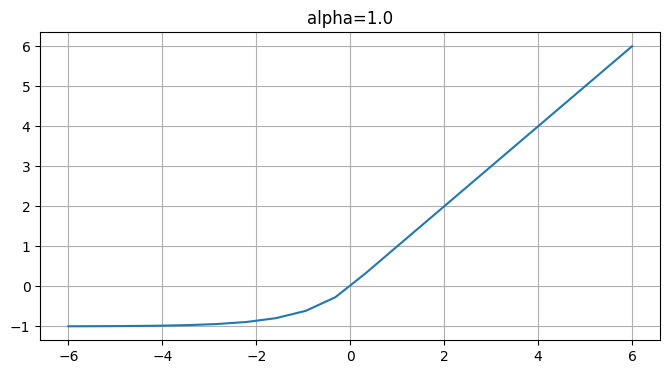

In [12]:
fig, ax = plt.subplots(1,1, figsize=(8,4))
ax.plot(test_x, test_y)
ax.grid()
plt.title("alpha=1.0")

Text(0.5, 1.0, 'alpha=2.0')

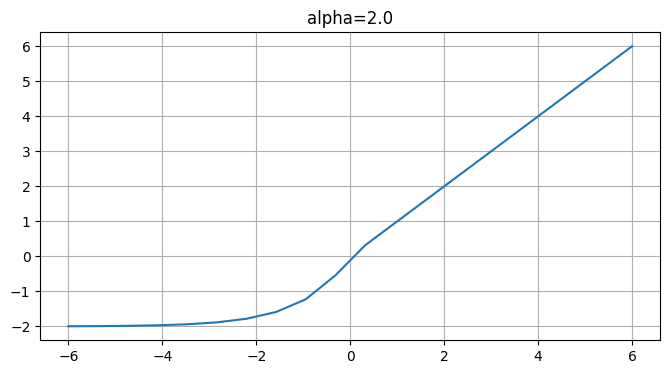

In [15]:
test_y = np.array([elu(x, alpha=2.0) for x in test_x])
fig, ax = plt.subplots(1,1, figsize=(8,4))
ax.plot(test_x, test_y)
ax.grid()
plt.title("alpha=2.0")

Downside: abit slower than ReLU

**GELU Activation function:**

Complex shape, approximates complex functions better. Expensive to compute - (real function), but the approximation however can be much faster to compute.
- GELU Approximation: z*sigmoid(1.702*z)

In [24]:
data = np.linspace(-5,5,100)

In [25]:
gelu_approximation = lambda x: x*(1/(1+np.exp(-(x*1.702))))
gelu_data = gelu_approximation(data)

Text(0.5, 1.0, 'GELU Approximation function')

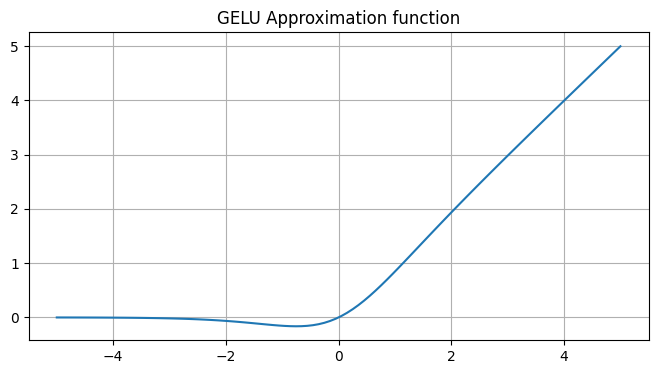

In [26]:
fig, ax = plt.subplots(1,1, figsize=(8,4))
ax.plot(data, gelu_data)
ax.grid()
plt.title("GELU Approximation function")

The GELU paper also introduced the SiLU activation function (sigmoid linear unit): which is equal to z*sigmoid(z). But it was outperformed by GELU in the author's tests:

Sigmoid Linear Unit: SiLU.

Text(0.5, 1.0, 'SiLU Approximation')

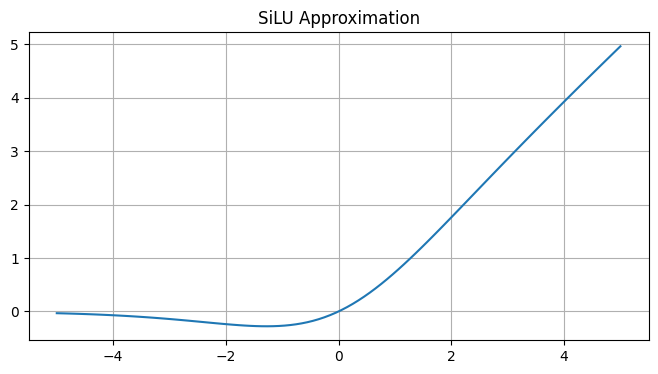

In [23]:
data = np.linspace(-5,5,100)
silu_approximation = lambda x: x*(1/(1+np.exp(-x)))
silu_data = silu_approximation(data)
fig, ax = plt.subplots(1,1, figsize=(8,4))
ax.plot(data, silu_data)
ax.grid()
plt.title("SiLU Approximation")

A 2017 paper by Prajit Ramachandran rediscovered the SiLU function by automatically searching for good activation functions.The authors named it Swish and the name caught on. In their paper Swish outperformed every other activation function including GELU. Swish was later generalized by adding an extra hyperparameter beta to scale the sigmoid function's input. The generalized swish function is 

![Activation Functions](../../data/report_images/gelu_swish_mish.png)

How gradient clipping would normally be used in pytorch:

In [ ]:
for epoch in range(num_epochs):
    model.train()
    total_loss = 0.0
    for batch_X, batch_y in dataloader:
        # Zero out gradients
        optimizer.zero_grad()
        
        # Forward pass
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        
        # Backward pass
        loss.backward()
        
        # Clip gradients: ensure total norm <= max_norm
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=max_norm, norm_type=2.0)
        
        # Update weights
        optimizer.step()
        
        total_loss += loss.item()
    
    avg_loss = total_loss / len(dataloader)
    print(f"Epoch {epoch+1}/{num_epochs}, Average Loss: {avg_loss:.4f}")